# Project 1 Revisited - Part 2: Global Explanations

## Load Your Saved Joblib File
- Create a new notebook for this assignment in your project 1 repository. Name the notebook "Explaining Models with Shap.ipynb"
- In your notebook, load the contents of your "best-models.joblib" file into a variable called "loaded_joblib."
- Save each object from the loaded_joblib dictionary as a separate variable in your notebook. (e.g. "X_train = loaded_joblib['X_train'])

## Explain your tree-based model with shap:
- Create an X_shap and y_shap variable from your training data (use shap.sample as needed).
- Create a model explainer,
Calculate the shap values for your model.
- Create a summary plot - with plot_type='bar':
    - In a Markdown cell below, display your saved feature importance image (that you used in your README) and compare the most important features according to SHAP vs. your original feature importances.
        - Are they the same features in both? If not, what's different?
    - Save your bar summary plot figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).
- Create a second summary plot - with plot_type='dot'
    - In a markdown cell, interpret the top 3 most important features and how they influence your model's predictions.
    - Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).

## Update your README.
- Insert your exported figures and corresponding interpretations from above into your README file. You should have:
    - a summary plot - bar version
        - Your comparison of most important features found by shap vs feature importance.
    - a summary plot - dot version
        - Your interpretation of the top 3 most important features and how they influence your model's predictions.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')
# Modeling
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import joblib
import shap
# Set Random State
SEED=321
np.random.seed(SEED)
# Display max columns
pd.set_option('display.max_columns', None)

# Re-load part 1

In [2]:
# load data from part 1 of 'Project 1 Revisited'
loaded_joblib = joblib.load('Project_1_Revisited')
loaded_joblib.keys()

dict_keys(['preprocessor', 'X_train', 'X_test', 'y_train', 'y_test', 'LinearRegression', 'RandomForestRegressor'])

In [3]:
X_train = loaded_joblib['X_train']
X_test = loaded_joblib['X_test']
y_train = loaded_joblib['y_train']
y_test = loaded_joblib['y_test']
preprocessor = loaded_joblib['preprocessor']
lin_reg = loaded_joblib['LinearRegression']
rand_for = loaded_joblib['RandomForestRegressor']

# Re-make dataframes

In [4]:
# fit column transformer and get feature names
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()

In [5]:
# remake X_train DF's w/feature names
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                         columns = feature_names, index = X_train.index)
X_train_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FDI60,7.220,1.0,0.064142,61.2510,1998.0,0.760582,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
DRD25,6.135,0.0,0.079294,111.2860,2009.0,1.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
NCP18,12.150,0.0,0.028593,151.0708,2004.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
NCS30,5.945,0.0,0.093009,127.8652,2004.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
FDI08,18.200,1.0,0.066285,247.2092,2004.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [6]:
# remake test X_test DF's w/feature names
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                         columns = feature_names, index = X_test.index)
X_test_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NCY06,15.250000,0.0,0.061531,132.2968,2007.0,0.760582,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
FDZ10,17.850000,0.0,0.044463,127.1020,1997.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
DRF49,7.270000,0.0,0.071078,114.2518,1997.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
FDN23,12.822634,1.0,0.075142,145.8444,1985.0,1.000000,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
NCH54,13.500000,0.0,0.121633,161.6920,1998.0,0.760582,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# SHAP

In [7]:
# initialize shap and java
shap.initjs()

In [8]:
# check length of traning df
len(X_train_df)

6392

## Create shap variables

In [10]:
# create X_shap using 500 samples and check
X_shap = shap.sample(X_train_df, nsamples=500, random_state=SEED)
X_shap.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FDT23,7.72,1.0,0.074669,76.3986,1987.0,2.000000,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
NCU30,5.11,0.0,0.034868,163.8210,2004.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
FDD44,8.05,1.0,0.078386,256.4646,2004.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
NCB54,8.76,0.0,0.050131,128.3336,1999.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
FDQ56,6.59,0.0,0.176748,82.7908,1998.0,0.760582,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [12]:
# create y_shap using corresponding values
y_shap = y_train.loc[X_shap.index]
y_shap

Item_Identifier
FDT23    1090.5804
FDT23    1947.4650
FDT23    1402.1748
NCU30    2773.0570
NCU30    2446.8150
           ...    
FDT32     188.4214
FDT32    1695.7926
FDT32    5087.3778
FDT32    2261.0568
FDT32    2826.3210
Name: Item_Outlet_Sales, Length: 2370, dtype: float64

## Create model explainer

In [16]:
# Create model explainer for random forest model
explainer = shap.TreeExplainer(rand_for)
explainer

In [17]:
# Get shap values
shap_values = explainer(X_shap, y_shap)
type(shap_values)

shap._explanation.Explanation

In [19]:
# display shape of shap_values
shap_values.shape

(500, 37)

## Displayed Shap Values

In [20]:
pd.DataFrame(shap_values.values, columns=X_shap.columns)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,64.120492,17.297031,31.517587,-980.353425,-63.837130,-10.629595,-29.798125,-3.695841,20.951057,0.169104,-5.340192,-1.383922,0.266606,-0.145306,-0.631516,1.353126,3.611843,1.200147,-0.801102,-0.335253,-1.169016,-0.429901,-0.354635,-0.025017,1.195216,-9.136107,1.233770,-0.116633,-46.290474,-5.737741,1.255385,0.162782,-2.425816,206.553353,5.173872,2.255602,-37.794497
1,-200.365005,-8.624555,58.390131,278.076133,-37.423843,0.746113,4.140759,-11.882815,-1.133830,-0.712289,-6.439370,1.869482,-0.163271,1.047335,-1.542858,-2.606411,15.815232,-1.527989,-1.267651,-0.790005,-7.100125,2.835745,-3.174389,0.070014,-0.609901,-2.896312,1.486438,-0.133665,-75.379472,52.211578,2.844081,1.255421,-15.919054,273.952951,2.450561,1.717088,-57.913498
2,262.844057,-21.350350,144.673689,2207.163728,4.083038,-15.483953,23.602946,0.374244,-0.220244,-0.097271,11.244308,9.622133,4.729251,219.099755,-5.535077,1.932247,45.017547,1.557125,-0.825513,-0.441217,1.882738,0.212350,1.139819,-0.059102,-0.907810,-17.568356,9.682768,0.002965,-94.195991,6.307522,13.832334,5.576702,-10.038214,417.084075,35.220190,12.538392,-70.626047
3,-14.595397,0.095643,15.815457,-205.377842,-11.278659,2.550806,40.871421,-0.243396,0.109814,-0.157983,-0.140204,0.188544,-1.576350,-21.043164,-1.041701,7.524606,-6.937894,-2.054997,-0.999702,-0.585274,-0.560397,1.910954,0.673298,-0.024149,3.370362,0.143039,1.554137,-0.074893,-59.301180,-9.056343,13.439035,-0.846220,59.863215,249.450244,6.285203,1.981677,-52.851055
4,5.769132,0.606327,-4.309845,-483.715072,-14.264931,-2.964587,-5.565926,-2.626026,-1.231709,-0.269053,-4.896501,-1.302360,-2.195243,-0.206265,-0.275444,-0.136737,-2.378485,-1.596507,-0.157800,-0.258784,-2.674390,-0.476827,-0.435804,-0.041021,-0.947514,-2.533364,1.102808,-2.677266,-29.427498,-2.550122,0.735907,0.414405,-2.206290,-1439.555830,-14.363375,1.421419,-24.297114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,194.014192,76.211919,224.541542,631.699581,42.667392,57.627626,22.677993,-3.393635,-0.761420,-2.793769,-3.524282,7.996518,160.425715,5.808481,-0.029584,3.512759,0.963540,-0.078560,-5.153842,-1.913327,4.690130,17.237519,-0.661671,-0.136174,-0.226602,2.349403,15.605382,0.103894,-62.612623,-4.012992,6.913875,33.558410,-1.285878,328.055986,13.038492,10.366425,-47.992245
496,35.770779,-2.436376,26.975195,-535.722283,-64.023298,-6.889103,-8.961569,-4.661014,-1.880307,-0.869100,-0.365687,1.659265,0.183746,10.692957,-0.567386,1.061646,1.262483,0.470474,25.812526,-0.600410,-6.379448,0.798473,-0.209875,-0.017770,-1.659184,-1.230433,-16.979598,-0.077863,-56.798674,-7.509726,8.183375,0.436676,-3.169890,220.574379,-29.334331,-10.641015,-51.078965
497,169.184429,27.253678,389.300276,1356.399800,-10.771944,31.028982,18.542940,-0.839227,-2.233475,-2.582261,-0.715969,5.183215,1.980459,8.391975,0.560905,2.238238,-0.346307,-4.626309,-0.872979,-0.616718,169.967303,8.227407,-1.629783,-0.224514,-1.781603,-7.646320,17.347624,0.136151,-94.548975,-3.570133,25.603419,7.272425,2.683565,346.710495,-5.429276,-16.353679,-60.070042
498,-49.624952,-5.752862,-56.579845,-1414.687808,-66.25

## Shap summary plot - bar

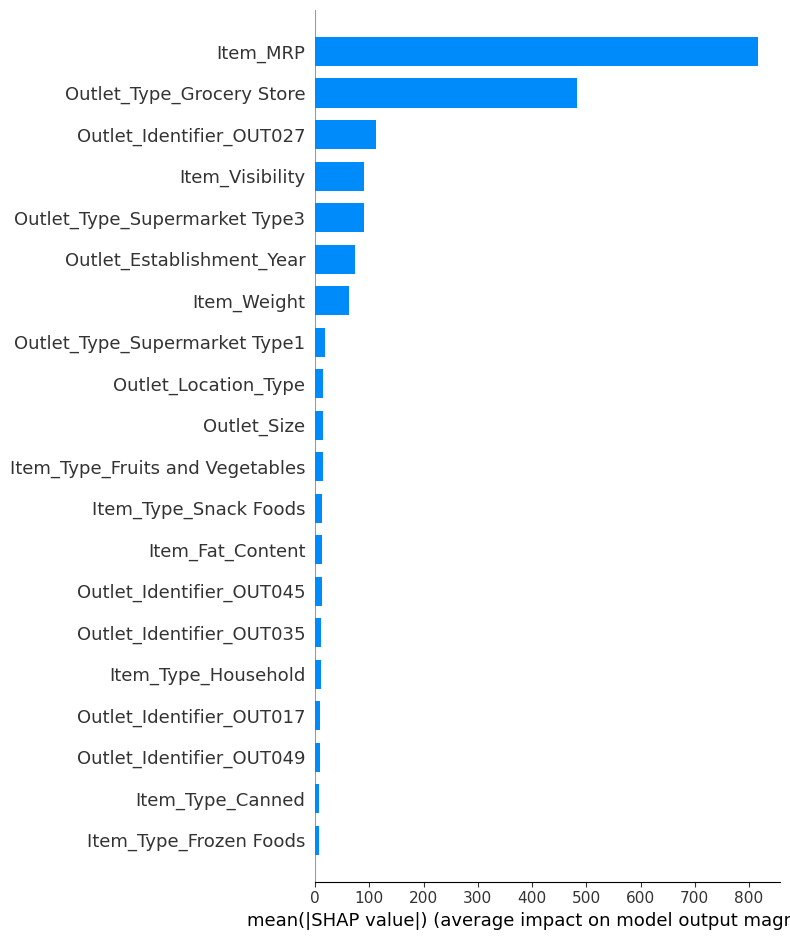

In [24]:
shap.summary_plot(shap_values, features=X_shap, plot_type='bar')

### Shap summary plot vs top 5 most important features

![importance](https://github.com/cipalisoc/-Core--Project-1-Revisited--Importances-and-Coefficients/blob/main/features.png?raw=true)

Between the shap summary plot and the feature importances plot above, the top two features ('Item_MRP' and 'Outlet_Type_Grocery_Store') were the top two. While 'Item_Visibility' and 'Outlet_Identifier_OUT27' were common in both plots, they were not in the same order, and 'Item_Weight' was in the top 5 most important features, but was in seventh in the shap summary plot.

## Shap summary plot - bar

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


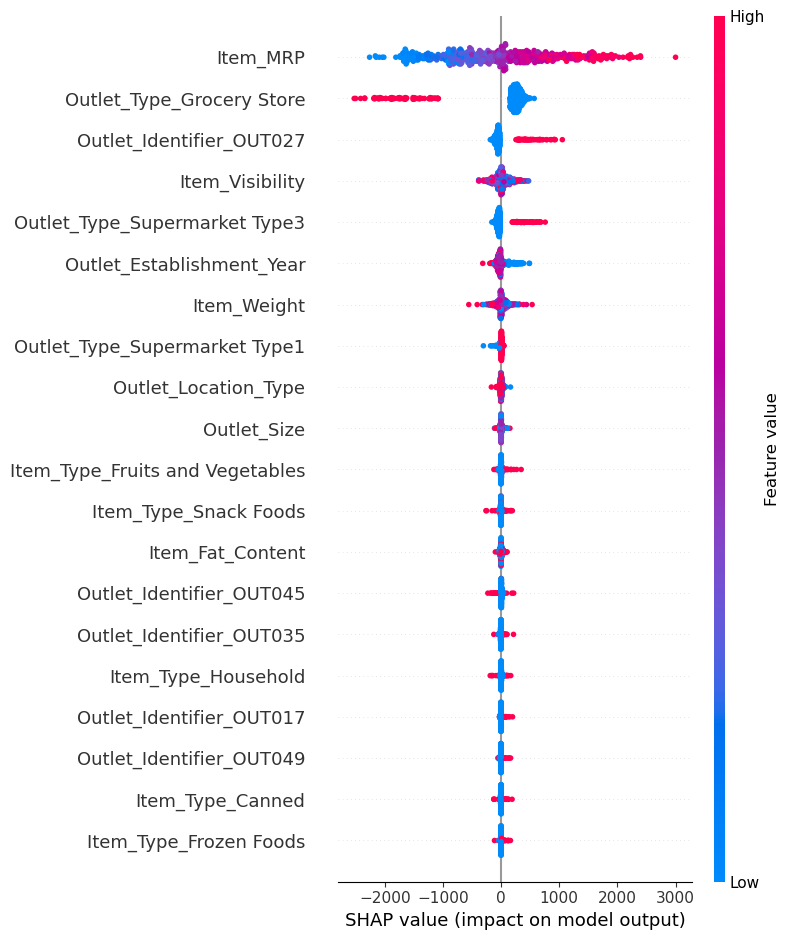

In [25]:
shap.summary_plot(shap_values, features=X_shap, plot_type='dot')

The dot plot of the shap summary above shows that 'Item_MRP', 'Outlet_Type_Grocery_Store', and 'Outlet_Identifier_OUT27' were the top three features that explained price prediction the most. For 'Item_MRP' the higher this value, the more it added to the predicted price. For 'Outlet_Type_Grocery_Store', the higher this value, the more it decreased price in price prediction. For 'Outlet_Identifier_OUT27', the higher this value, the more it added to price in price prediction.